In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:

from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris (1).csv


In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
#Clean the dataset
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop("Id", axis=1, inplace=True)


In [10]:
#Preprocessing
X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=69)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#SVM
model = SVC(kernel='rbf', random_state=69)

#K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=69)
scores = cross_val_score(model, X_scaled, y_train, cv=kf)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [1.         0.95833333 0.95833333 0.95833333 0.95833333]
Mean CV Accuracy: 0.9666666666666668


In [19]:
#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=kf, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=69)

#mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

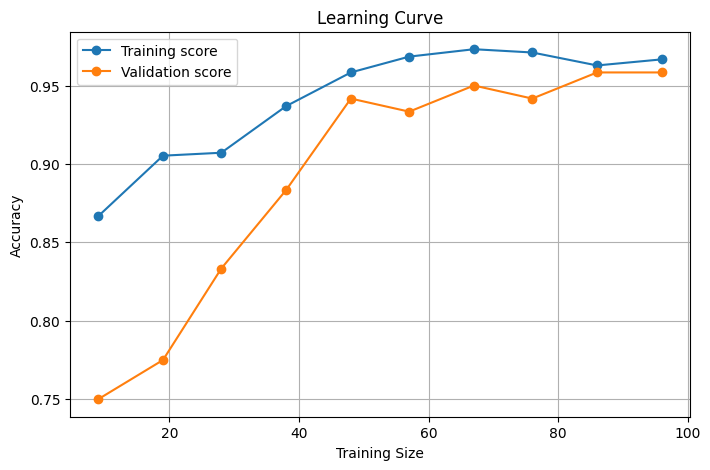

In [25]:
#plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

print("Model is :")
if acc >= 0.9:
    print("well-balanced")
elif acc < 0.7:
    print("underfitting")
else:
    print("overfitting")

Test Accuracy: 0.9
Model is :
well-balanced


The learning curve shows how the model improves with more data.

If training accuracy is high and validation is low, it indicates overfitting.

If both training and validation scores are low, it indicates underfitting.

